## Delta-Notch model

article: 

Pattern formation by lateral inhibition, Collier, Monk, Maini and Lewis.

Model:

$$\large \begin{align*}
\dfrac{d}{dt}\left( \dfrac{N_p}{N_0} \right) &= F\left(\dfrac{\bar{D_p}}{D_0} \right) - \mu \dfrac{N_p}{N_0} \\
\dfrac{d}{dt}\left( \dfrac{D_p}{D_0} \right) &= G\left(\dfrac{N_p}{N_0} \right) - \rho \dfrac{D_p}{D_0}
\end{align*}$$ 

Where:

- $N$ Notch level, is the receptor for lateral inhibition. 
- $D$ Delta activity, delivers lateral inhibition (ligand?).
- $N_p$ Notch level in a cell p, $D_p$ Delta activity in cell p. 
- $N_0$ Typical notch level, $D_0$ Typical delta activity. 
- $\bar{D_p}$ mean delta activity around cell p (the neigborhood has to be defined). 

Delta bindings leads to the activation of Notch. 

The model assumes: 

- Cells interact only with neigbors. 
- Rate of production of Notch activity is an increasing function of $D$, F.
- Rate of production of Delta activity is a decreasing function of $N$, G. 
- Production of $N$ and $D$ is balanced by exponential decay with fixed rate contstants, $\mu$ and $\rho$ (second terms).
- Level of activated $N$ determines the cell fate: low, primary fate, high, secondary fate.   

### Interpretation and Adimensional equations

Let: 

- $n_p := N_p/N_0$
- $d_p := D_p/D_0$
- $f := (1/\mu)F$
- $g := (1/\rho)G$
- $v := \rho/\mu$


Then, $f(\bar{d_p})$ is the equilibrium value when $d_p$ is kept fixed ($n_p \longrightarrow f(\bar{d_p})$ as $t \longrightarrow \infty$). 

Can think of $F(\bar{d_p})$ as the rate of production of Notch activity. 

$$ \Large
\begin{align*}
\dfrac{d}{dt}n_p &= f \left(\bar{d_p} \right) - n_p \\
\dfrac{d}{dt}d_p &= v \left( g(n_p) - d_p \right) 
\end{align*}
$$

where $t := \mu \tau$.

In [1]:
import numpy as np 
import scipy as scipy
import matplotlib.pylab as plt
from scipy.integrate import ode

### Two cells model

Consider a two cells model with periodic boundary conditions. Then, $\bar{d_1} = d_2$ and $\bar{d_2} = d_1$. 

Let

$$ \Large
\begin{align*}
f(x) &= \dfrac{x^k}{a + x^k} \\
g(x) &= \dfrac{1}{1 + bx^h} 
\end{align*}
$$

Then, 

$$ \Large
\begin{cases}
\begin{align*}
\dfrac{d}{dt}n_j &= \dfrac{d_{j+1}^k}{a + d_{j+1}^k} - n_j \\
\dfrac{d}{dt}d_j &= v \left( \dfrac{1}{1 + bn_j^h} - d_j \right) 
\end{align*}
\end{cases}
$$

for $j \in \{ 1, 2\} \ (\ j \mod \ 2 \ )$ and $h, k > 0$.

In [2]:
def twoCells(t, y, a, b, v):
    
    # y[0] = n_1
    # y[1] = d_1
    # y[2] = n_2
    # y[3] = d_2
    
    k = 2
    h = 2
    
    dy = [0, 0, 0, 0]
    
    dy[0] = (y[3]**k)/(a + y[3]**k) - y[0]
    dy[1] = v * (1/(1 + b*y[0]) - y[1])
    
    dy[2] = y[1]/(a + y[1]) - y[2]
    dy[3] = v * (1/(1 + b*y[2]**h) - y[3])
    
    
    return(dy)

In [29]:
N = 1000
tfinal = 25
t = np.linspace(start=0, stop=tfinal, num=N)
y0 = [1, 1, 0.99, 0.99]
t0 = 0

a = 0.01
b = 100
v = 1

In [30]:
solver = scipy.integrate.ode(twoCells).set_integrator('dopri5', nsteps=100000)
solver.set_initial_value(y0, t0).set_f_params(a, b, v)

sol = np.zeros((N, 4))
sol[0] = y0

k = 1
while solver.successful() and solver.t < tfinal:
    solver.integrate(t[k])
    sol[k] = solver.y
    k += 1

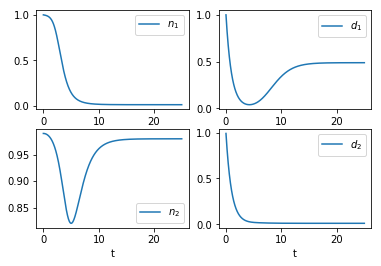

In [31]:
plt.subplot(221)
plt.plot(t, sol[:,0], label='$n_1$')
plt.xlabel('t')
plt.legend()

plt.subplot(222)
plt.plot(t, sol[:,1], label='$d_1$')
plt.xlabel('t')
plt.legend()

plt.subplot(223)
plt.plot(t, sol[:,2], label='$n_2$')
plt.xlabel('t')
plt.legend()

plt.subplot(224)
plt.plot(t, sol[:,3], label='$d_2$')
plt.xlabel('t')
plt.legend()

plt.savefig('pend.png', format='png', dpi=500)
plt.show()

In [6]:
def manyCells1D(t, y, a, b, v, NCells):
    
    # 1d line of cells with periodic Boundary conditions.
    #
    # y[0] = n_1
    # y[1] = d_1
    # y[2] = n_2
    # y[3] = d_2
    # ...
    
    k = 2
    h = 2
    
    # pick all the even and odd entries of y: 
    n = [y for i,y in enumerate(y) if i%2==0]
    d = [y for i,y in enumerate(y) if i%2==1]
    
    # compute the local average in a line. 
    dbar = (np.roll(d, -1) + np.roll(d, 1))/2
    
    dn = [0]*NCells
    dd = [0]*NCells
    
    for i in range(NCells):
        dn[i] = (dbar[i]**k)/(a + dbar[i]**k) - n[i]
        dd[i] = v * (1/(1 + b*n[i]**h) - d[i])
    
    N = 2*NCells
    dy = [0]*N
    
    dy[0:N:2] = dn
    dy[1:N:2] = dd
    
    return(dy)

In [7]:
n = [1]*4
d = [2]*4

d[0:3:2] = [5, 6]
d

[5, 2, 6, 2]

In [32]:
NCells = 2
y0 = [1, 1, 0.99, 0.99]
t0 = 0

N = 1000
tfinal = 25
t = np.linspace(start=0, stop=tfinal, num=N)

a = 0.01
b = 100
v = 1

In [33]:
solver = scipy.integrate.ode(manyCells1D).set_integrator('dopri5', nsteps=100000)
solver.set_initial_value(y0, t0).set_f_params(a, b, v, NCells)

sol = np.zeros((N, NCells*2))
sol[0] = y0

k = 1
while solver.successful() and solver.t < tfinal:
    solver.integrate(t[k])
    sol[k] = solver.y
    k += 1

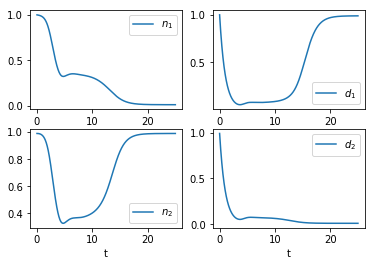

In [34]:
plt.subplot(221)
plt.plot(t, sol[:,0], label='$n_1$')
plt.xlabel('t')
plt.legend()

plt.subplot(222)
plt.plot(t, sol[:,1], label='$d_1$')
plt.xlabel('t')
plt.legend()

plt.subplot(223)
plt.plot(t, sol[:,2], label='$n_2$')
plt.xlabel('t')
plt.legend()

plt.subplot(224)
plt.plot(t, sol[:,3], label='$d_2$')
plt.xlabel('t')
plt.legend()

plt.show()

In [35]:
NCells = 70
y0 = np.random.uniform(high=1, low=0.95, size=2*NCells)
t0 = 0

N = 2000
tfinal = 30

t = np.linspace(start=0, stop=tfinal, num=N)

a = 0.01
b = 100
v = 1

solver = scipy.integrate.ode(manyCells1D).set_integrator('dopri5', nsteps=100000)
solver.set_initial_value(y0, t0).set_f_params(a, b, v, NCells)

sol = np.zeros((N, NCells*2))
sol[0] = y0

k = 1
while solver.successful() and solver.t < tfinal:
    solver.integrate(t[k])
    sol[k] = solver.y
    k += 1

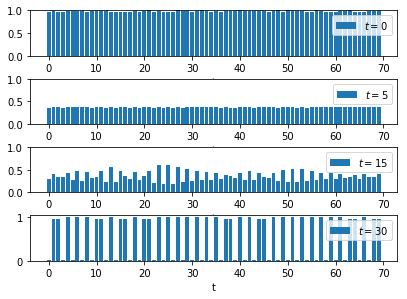

In [36]:
x = range(0,NCells)
width = 0.8

plt.subplot(411)
plt.bar(x, sol[0,0:2*NCells:2], width, label='$t = 0$')
plt.xlabel('t')
plt.ylim((0,1))
plt.legend()

plt.subplot(412)
plt.bar(x, sol[266,0:2*NCells:2], width, label='$t = 5$')
plt.xlabel('t')
plt.ylim((0,1))
plt.legend()

plt.subplot(413)
plt.bar(x, sol[800,0:2*NCells:2], width, label='$t = 15$')
plt.xlabel('t')
plt.ylim((0,1))
plt.legend()


plt.subplot(414)
plt.bar(x, sol[1999,0:2*NCells:2], width, label='$t = 30$')
plt.xlabel('t')
plt.legend()

plt.subplots_adjust(top=0.95, bottom=0.08, left=0.10, right=0.95, hspace=0.5,
                    wspace=0.35)
plt.savefig('manyCellsLine.png', format='png', dpi=500)
plt.show()

### Todo: Hexagonal-grid model

<img src='hex.jpg' width="300" height="350">

### Idea: 

- Unroll the grid row by row.
- Use Kroneker product to compute local average. 

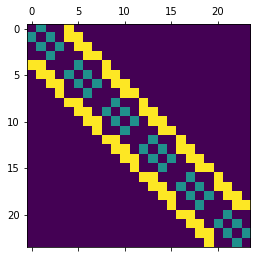

In [8]:
NCols = 4
d1 = np.concatenate(([0., 1.], [0.]*(NCols-2)))
diagKern = scipy.linalg.toeplitz(d1) 

d2 = np.concatenate(([1., 0.], [0.]*(NCols-2)))
d3 = np.concatenate(([1., 1.], [0.]*(NCols-2)))

upOffKern = scipy.linalg.toeplitz(d3, d2)  
lowOffKern = scipy.linalg.toeplitz(d2, d3)  

# To generalize use a [1]*N vector instead:
Nrows = 6
upOffDiag = np.diag([2.]*(Nrows-1), 1) 
lowOffDiag = np.diag([2.]*(Nrows-1), -1) 

A = np.kron(np.eye(Nrows), diagKern)
B = np.kron(lowOffDiag, lowOffKern) + np.kron(upOffDiag, upOffKern) 

plt.matshow(A + B, cmap=plt.cm.viridis)
plt.show()

In [38]:
def hexGridCells(t, y, a, b, v, NxCells, NyCells):
    
    # Cells are arranged in a ixj hexagonal grid. 
    # Zero boundary conditions. 
    #
    # Reshape the grid into a 1xij-vector: [C11, C12, ..., C1j, C21, C22, ..., C2j, ..., Ci1, Ci2, ..., Cij]
    # 
    # y[0] = n11
    # y[1] = d11
    # y[2] = n12
    # y[3] = d12
    # ...
    # y[2*ij-2] = nij
    # y[2*ij-1] = dij
    
    
    # pick all the even and odd entries of y: 
    n = [y for i,y in enumerate(y) if i%2==0]
    d = [y for i,y in enumerate(y) if i%2==1]
    
    # compute the local average:
    
    # type of average (neigbors of cell ij): 
    NCols = NxCells
    d1 = np.concatenate(([0., 1.], [0.]*(NCols-2)))
    diagKern = scipy.linalg.toeplitz(d1) 

    d2 = np.concatenate(([1., 0.], [0.]*(NCols-2)))
    d3 = np.concatenate(([1., 1.], [0.]*(NCols-2)))

    upOffKern = scipy.linalg.toeplitz(d3, d2)  
    lowOffKern = scipy.linalg.toeplitz(d2, d3)  

    # To generalize use a [1]*N vector instead:
    NRows = NyCells
    upOffDiag = np.diag([1.]*(NRows-1), 1) 
    lowOffDiag = np.diag([1.]*(NRows-1), -1) 

    A = np.kron(np.eye(NRows), diagKern)
    B = np.kron(lowOffDiag, lowOffKern) + np.kron(upOffDiag, upOffKern) 

    dsum = (A + B).dot(d)
    dcount = (A + B).dot(np.ones(NCols*NRows))
    
    dbar = [s/c for s,c in zip(dsum, dcount)]
    
    
    # Delta-Notch dy:
    k = 2
    h = 2
    
    NCells = NxCells*NyCells
    
    dn = [0]*NCells
    dd = [0]*NCells
    
    for i in range(NCells):
        dn[i] = (dbar[i]**k)/(a + dbar[i]**k) - n[i]
        dd[i] = v * (1/(1 + b*n[i]**h) - d[i])
    
    N = 2*NCells
    dy = [0]*N
    
    dy[0:N:2] = dn
    dy[1:N:2] = dd
    
    return(dy)

In [46]:
NxCells = 9
NyCells = 9

t0 = 0
y0 = np.random.uniform(high=1, low=0.98, size=2*NxCells*NyCells) 

a = 0.01
b = 100
v = 1

dy = hexGridCells(t0, y0, a, b, v, NxCells, NyCells)

In [47]:
N = 100
tfinal = 30

t = np.linspace(start=0, stop=tfinal, num=N)

solver = scipy.integrate.ode(hexGridCells).set_integrator('dopri5', nsteps=1000000)
solver.set_initial_value(y0, t0).set_f_params(a, b, v, NxCells, NyCells)

sol = np.zeros((N, 2*NxCells*NyCells))
sol[0] = y0

k = 1
while solver.successful() and solver.t < tfinal:
    solver.integrate(t[k])
    sol[k] = solver.y

C:\Users\Personal\Anaconda3\lib\site-packages\scipy\integrate\_ode.py:1035: UserWarning: dopri5: step size becomes too small
  self.messages.get(idid, 'Unexpected idid=%s' % idid))


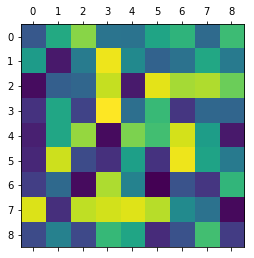

In [48]:
M = np.reshape(a=sol[1, 0:2*NxCells*NyCells:2], newshape=(NxCells, NyCells))

plt.matshow(M, cmap=plt.cm.viridis)
plt.show()